### Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score, mean_absolute_error, mean_squared_error, jaccard_score, f1_score

### Importing the Dataset  And Exploring 

In [ ]:
df = pd.read_csv('Weather_Data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [ ]:
len(df)

3271

In [ ]:
df.shape

(3271, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [ ]:
df.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['WindGustDir'].value_counts()

WindGustDir
W      1425
SSE     239
ENE     214
NE      169
S       169
SSW     163
NNE     149
ESE     140
WSW     134
E       122
WNW      79
NW       68
SE       68
NNW      52
SW       50
N        30
Name: count, dtype: int64

### Data Preprocessing 

One Hot Encoding the values because they are ordinal

In [ ]:
df_proc = pd.get_dummies(df, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'])

In [ ]:
df_proc['RainTomorrow'].value_counts()

RainTomorrow
No     2422
Yes     849
Name: count, dtype: int64

Converting the target value to 1 or 0

In [ ]:
label_mapping = {'Yes' : 1, 'No': 0}
df_proc['RainTomorrow'] = df_proc['RainTomorrow'].map(label_mapping)
df_proc.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,41,17,20,92,...,False,False,False,True,False,False,False,False,False,True
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,41,9,13,83,...,False,False,False,False,False,False,False,False,False,True
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,41,17,2,88,...,False,False,False,False,False,False,False,False,False,True
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,41,22,20,83,...,False,False,False,False,False,False,False,False,False,True
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,41,11,6,88,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
df_proc['RainTomorrow'].value_counts()

RainTomorrow
0    2422
1     849
Name: count, dtype: int64

In [ ]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             3271 non-null   object 
 1   MinTemp          3271 non-null   float64
 2   MaxTemp          3271 non-null   float64
 3   Rainfall         3271 non-null   float64
 4   Evaporation      3271 non-null   float64
 5   Sunshine         3271 non-null   float64
 6   WindGustSpeed    3271 non-null   int64  
 7   WindSpeed9am     3271 non-null   int64  
 8   WindSpeed3pm     3271 non-null   int64  
 9   Humidity9am      3271 non-null   int64  
 10  Humidity3pm      3271 non-null   int64  
 11  Pressure9am      3271 non-null   float64
 12  Pressure3pm      3271 non-null   float64
 13  Cloud9am         3271 non-null   int64  
 14  Cloud3pm         3271 non-null   int64  
 15  Temp9am          3271 non-null   float64
 16  Temp3pm          3271 non-null   float64
 17  RainTomorrow  

In [ ]:
df_proc.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3

In [ ]:
df_proc = df_proc.drop(columns=['Date'])

In [ ]:
df_proc = df_proc.astype(float)

### Feature Preparation

In [ ]:
X = df_proc.drop(columns=['RainTomorrow'])
X = np.asarray(X)
X[0:2]

array([[1.9500e+01, 2.2400e+01, 1.5600e+01, 6.2000e+00, 0.0000e+00,
        4.1000e+01, 1.7000e+01, 2.0000e+01, 9.2000e+01, 8.4000e+01,
        1.0176e+03, 1.0174e+03, 8.0000e+00, 8.0000e+00, 2.0700e+01,
        2.0900e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.9500e+01, 2.5600e+01, 6.0000e+00, 3.4000e+00, 2.7000e+00,
        4.1000e+01, 9.0000e

In [ ]:
Y = df_proc['RainTomorrow']
Y = np.asarray(Y)
Y[0:5]

array([1., 1., 1., 1., 1.])

### Train and Test Dataset Preparation

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=10)
print(f"x_train shape : {x_train.shape} y_train shape : {y_train.shape}")
print(f"x_test shape : {x_test.shape} y_test shape : {y_test.shape}")

x_train shape : (2616, 66) y_train shape : (2616,)
x_test shape : (655, 66) y_test shape : (655,)


### Linear Regression

In [ ]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)
y_pred_1 = LinearReg.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_1)
mse = mean_squared_error(y_test, y_pred_1)
r2_linear =  r2_score(y_test, y_pred_1)

In [ ]:
scores_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R2)'],
    'Score': [mae, mse, r2_linear]
})

# Display the DataFrame
scores_df

,Metric,Score
0,Mean Absolute Error (MAE),0.256318
1,Mean Squared Error (MSE),0.115721
2,R-squared (R2),0.427132


### K Nearest Neighbours

In [ ]:
k_range = 10
accuracy = []

for i in range(1,k_range):
    clf = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_pred_2 = clf.predict(x_test)
    print("-------------------------------------------")
    print(f"For K  value {i}")
    print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(x_train)))
    print("Test set Accuracy: ", accuracy_score(y_test, y_pred_2))
    print("-------------------------------------------")
    accuracy.append(accuracy_score(y_test, y_pred_2))

-------------------------------------------
For K  value 1
Train set Accuracy:  1.0
Test set Accuracy:  0.7709923664122137
-------------------------------------------
-------------------------------------------
For K  value 2
Train set Accuracy:  0.8792048929663608
Test set Accuracy:  0.8015267175572519
-------------------------------------------
-------------------------------------------
For K  value 3
Train set Accuracy:  0.8780581039755352
Test set Accuracy:  0.8229007633587786
-------------------------------------------
-------------------------------------------
For K  value 4
Train set Accuracy:  0.8581804281345565
Test set Accuracy:  0.8183206106870229
-------------------------------------------
-------------------------------------------
For K  value 5
Train set Accuracy:  0.8597094801223242
Test set Accuracy:  0.8198473282442749
-------------------------------------------
-------------------------------------------
For K  value 6
Train set Accuracy:  0.849388379204893
Test se

In [ ]:
accuracy_arr = np.asanyarray(accuracy)
print(f"The best number of K is {accuracy_arr.argmax()+1} with accuracy of {accuracy_arr.max()}" )

The best number of K is 6 with accuracy of 0.8351145038167939


In [ ]:
KNN_clf = KNeighborsClassifier(n_neighbors=6)
KNN_clf.fit(x_train,y_train)
y_pred_2 =KNN_clf.predict(x_test)
y_pred_2[0:5]

array([0., 0., 1., 0., 0.])

In [ ]:
knn_jaccard = jaccard_score(y_test, y_pred_2)
knn_accuracy = accuracy_score(y_test, y_pred_2)
knn_f1 = f1_score(y_test, y_pred_2, average='weighted')
print("knn_jaccard : ",knn_jaccard)
print("knn_accuracy : ",knn_accuracy)
print("knn_f1_score : ",knn_f1)

knn_jaccard :  0.46798029556650245
knn_accuracy :  0.8351145038167939
knn_f1_score :  0.8214513192476693


### Decision Tree

In [ ]:
from sklearn.model_selection import cross_val_score
max_depths = range(1, 11)

# Initialize variables to store the best max depth and its corresponding accuracy
best_max_depth = None
best_accuracy = 0

# Perform cross-validation for each maximum depth
for max_depth in max_depths:
    # Create a decision tree classifier with the current maximum depth
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    
    # Perform cross-validation with 5 folds
    scores = cross_val_score(dtree, x_train, y_train, cv=5)
    
    # Calculate the average accuracy and standard deviation for the current maximum depth
    mean_accuracy = np.mean(scores)
    std_dev = np.std(scores)
    
    # Print the results for the current maximum depth
    print(f"Max Depth: {max_depth}, Mean Accuracy: {mean_accuracy:.3f}, Std Dev: {std_dev:.3f}")
    
    # Update the best max depth if the current accuracy is higher
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_max_depth = max_depth

# Print the best max depth and its corresponding accuracy
print(f"\nBest Max Depth: {best_max_depth}, Best Mean Accuracy: {best_accuracy:.3f}")

Max Depth: 1, Mean Accuracy: 0.803, Std Dev: 0.022
Max Depth: 2, Mean Accuracy: 0.818, Std Dev: 0.017
Max Depth: 3, Mean Accuracy: 0.819, Std Dev: 0.010
Max Depth: 4, Mean Accuracy: 0.825, Std Dev: 0.011
Max Depth: 5, Mean Accuracy: 0.822, Std Dev: 0.006
Max Depth: 6, Mean Accuracy: 0.820, Std Dev: 0.010
Max Depth: 7, Mean Accuracy: 0.809, Std Dev: 0.012
Max Depth: 8, Mean Accuracy: 0.807, Std Dev: 0.013
Max Depth: 9, Mean Accuracy: 0.800, Std Dev: 0.008
Max Depth: 10, Mean Accuracy: 0.795, Std Dev: 0.004

Best Max Depth: 4, Best Mean Accuracy: 0.825


In [ ]:
DT_clf = DecisionTreeClassifier(criterion='entropy',max_depth = 4)
DT_clf.fit(x_train, y_train)
y_pred_3 = DT_clf.predict(x_test)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(DT_clf, out_file='tree.dot', filled=True, feature_names=[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'RainToday_No', 'RainToday_Yes'])
!dot -Tpng tree.dot -o tree.png

In [ ]:
Tree_Accuracy_Score = jaccard_score(y_test, y_pred_3)
Tree_JaccardIndex = accuracy_score(y_test, y_pred_3)
Tree_F1_Score = f1_score(y_test, y_pred_3, average='weighted')


### Logistic Regression

In [ ]:
Logistic_clf = LogisticRegression(solver = 'liblinear',C=0.01) 
Logistic_clf.fit(x_train,y_train)
y_pred_4 = Logistic_clf.predict(x_test)
y_pred_4[0:5]

array([0., 0., 1., 0., 0.])

In [ ]:
y_pred4_prob = Logistic_clf.predict_proba(x_test)
y_pred4_prob

array([[0.92430491, 0.07569509],
       [0.82919146, 0.17080854],
       [0.03760128, 0.96239872],
       ...,
       [0.13300867, 0.86699133],
       [0.85769622, 0.14230378],
       [0.62944387, 0.37055613]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred_4, labels=[1,0]))

[[112  72]
 [ 31 440]]


Confusion matrix, without normalization
[[112  72]
 [ 31 440]]


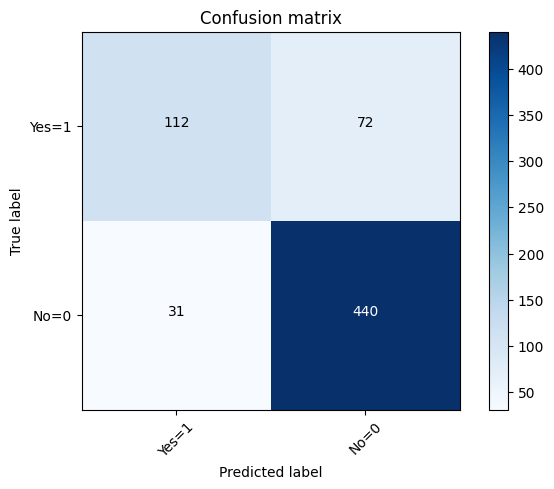

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_4, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes=1','No=0'],normalize= False,  title='Confusion matrix')

In [ ]:
from sklearn.metrics import log_loss
logistic_log = log_loss(y_test, y_pred4_prob)

In [ ]:
Logistic_Accuracy_Score = jaccard_score(y_test, y_pred_4)
Logistic_JaccardIndex = accuracy_score(y_test, y_pred_4)
Logistic_F1_Score = f1_score(y_test, y_pred_4, average='weighted')
print(Logistic_Accuracy_Score)
print(Logistic_JaccardIndex)
print(Logistic_F1_Score)

0.5209302325581395
0.8427480916030534
0.8361692056982617


### SVM

In [ ]:
SVM_clf = SVC(kernel='linear')
SVM_clf.fit(x_train, y_train)
y_pred_5 = SVM_clf.predict(x_test)

In [ ]:
SVM_Accuracy_Score = accuracy_score(y_test, y_pred_5)
SVM_JaccardIndex = jaccard_score(y_test, y_pred_5)
SVM_F1_Score = f1_score(y_test, y_pred_5, average='weighted')
print(f"SVM_Accuracy_Score ={SVM_Accuracy_Score} SVM_JaccardIndex = {SVM_JaccardIndex} SVM_F1_Score = {SVM_F1_Score }" )

SVM_Accuracy_Score =0.8381679389312977 SVM_JaccardIndex = 0.5159817351598174 SVM_F1_Score = 0.8323724157154069


### Error and Evaluation Report

In [ ]:
error_values ={

    "Models" : ['Linear Regression','KNeighbourhood', 'Decision Tree','Logistic Regression','SVM'],
    'MSE': [mae, np.nan, np.nan,np.nan,np.nan],  
    'MAE': [mse, np.nan, np.nan,np.nan,np.nan],  
    'R2 Score' : [r2_linear,np.nan,np.nan,np.nan,np.nan],
    'Accuracy Score' : [np.nan, knn_accuracy,Tree_Accuracy_Score, Logistic_Accuracy_Score,SVM_Accuracy_Score],
    'Jaccard Index' : [np.nan, knn_jaccard,Tree_JaccardIndex,Logistic_JaccardIndex,SVM_JaccardIndex],
    'F1 Score' : [np.nan, knn_f1,Tree_F1_Score,Logistic_F1_Score,SVM_F1_Score],
    'Log Loss' : [ np.nan, np.nan,np.nan,logistic_log,np.nan],
}
report_df = pd.DataFrame(error_values)


In [ ]:
report_df

,Models,MSE,MAE,R2 Score,Accuracy Score,Jaccard Index,F1 Score,Log Loss
0,Linear Regression,0.256318,0.115721,0.427132,NaN,NaN,NaN,NaN
1,KNeighbourhood,NaN,NaN,NaN,0.835115,0.467980,0.821451,NaN
2,Decision Tree,NaN,NaN,NaN,0.480349,0.818321,0.813263,NaN
3,Logistic Regression,NaN,NaN,NaN,0.520930,0.842748,0.836169,0.358573
4,SVM,NaN,NaN,NaN,0.838168,0.515982,0.832372,NaN


### Conclusion:

Based on the observed accuracy values KNN performed better but with changes we can tune other models

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f58d2d2e-22a8-4088-a84c-41fd0a593bac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>